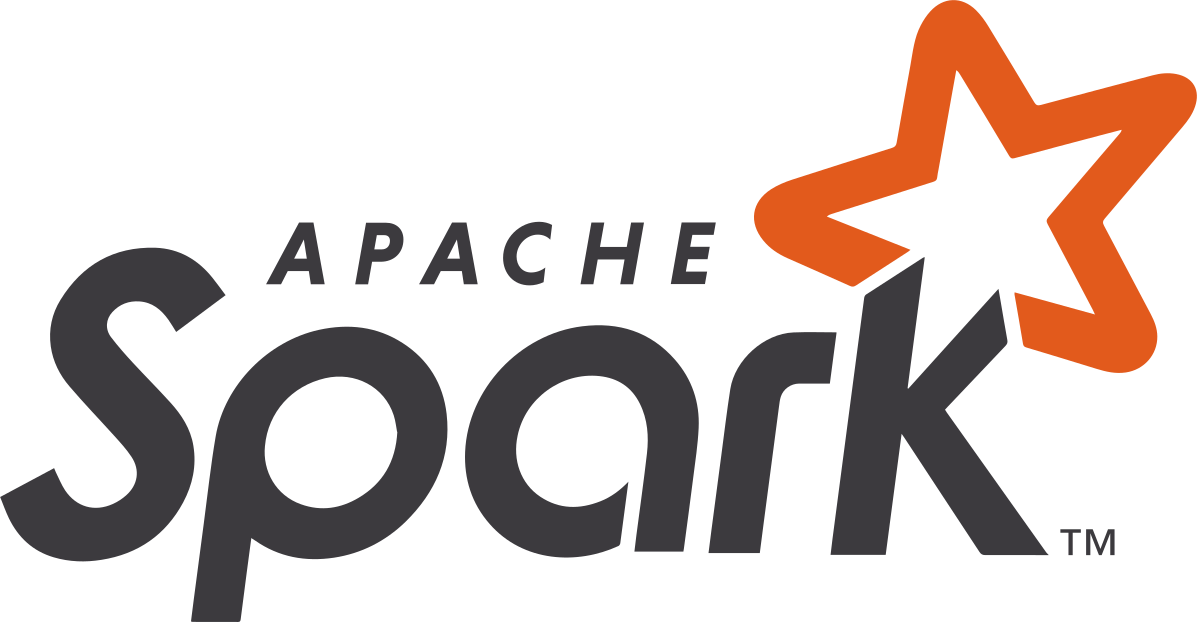

# 1. Introduction to Apache Spark

## Spark Core Concepts and Architecture

* **Spark Clusters**
* **Resource management system**
* **Spark Applications**
* **Spark drivers**
* **Spark executors**

### Spark Clusters and Resource Management System

* Spark Cluster
    * Master/Slave Architecture
* Spark Resource Management
    * Use YARN
    * Kubernetes
    * Standalone

### Spark Applications

* Data processing logic expressed using Spark APIs: The code
* Spark `driver`:
    * The central coordinator of a Spark application to interact with the cluster manager.
    * Requests the cluster manager to launch `executors`
    * Manages and distributes tasks onto `executors`
    * Performs tasks through a component called `SparkSession`

### Spark Drivers and Executors

* Spark Executor:
  * Each executor is a JVM process
  * Each executor JVM is dedicated to the Spark Application to support application isolation
  * Is the slave in the Spark Application (Driver is the master)
  * Caches portions of the result data

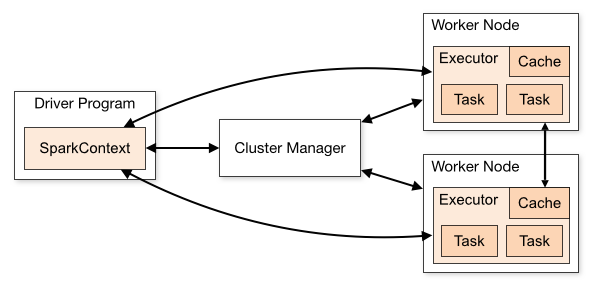

### Spark Unified Stack

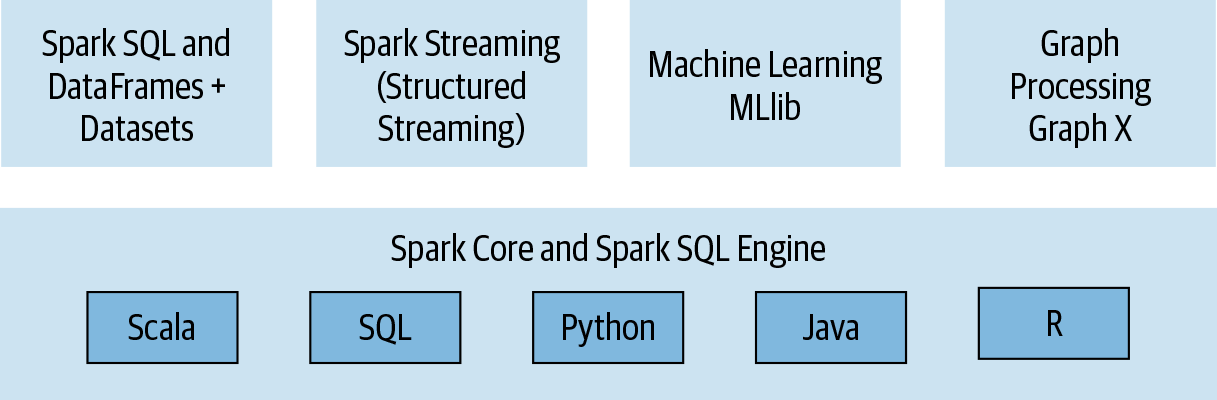

### Spark Core

* Main Distributed Data Processing Engine
* Consists of:
    * Resilient Distributed Datasets (RDD)
    * Compute Infratructure
* Responsible for:
    * Coordinating, Scheduling and Distributing tasks
    * Handling compute failure
    * Move data between nodes (`Data Shuffling`)

* RDD
    * A fault tolerant collection of objects partitioned across the cluster that can be manipulated in paraller
    * Provides a set of APIs for developers to process data
    * RDD APIs are exposed to multiple prgramming langauges like JAVA, SCALA, Python, and R.

### Spark SQL

* Spark SQL is a module build on top of Spark Core for structured data processing
* Behine the scenes uses Spark SQL Catalyst optimizer
* Spark SQL elevates Spark's flexibity to read and write data to and from various structured formats and storage engine

### Spark Structured Streaming

* Process real-time streaming data from various data sources in high-throughput and fault-tolerant manner
* Can be inegsted from sources like Kafka, Flume, HDFS, etc.
* Can combine batch and interactive queries

### Spark MLlib

* Machine Learning library
* More than 50 Ml Algorithms

### Spark GraphX

* Processing data structure consisting of vertices and edges connecting them
* Supports graph-parallel computations
* Multiple graph processing algorithms

### SparkR

* Lightweight front end R package to use Apache Spark
* Leverages Spark distributed compute engine

## Apache Spark 3.0

### Adaptive Query Execution Framework

* Use statistics to enhance query execution
* Dynamically change join, merge etc strategies

### Dynamic Partitioning Pruning

* To avoid reading unnecessary 

### Accelerator-aware Scheduler

* To allow users to specify compute specs based on the neds (eg CPU vs GPU)

# 2. Working with Apache Spark

## Downloading and Installation

## Spark Shell

## Spark UI and Basic Interactions with Spark

* Run Spark Shell
* Browse to http://sparkc:4040

* Load hosts file into /test/ on hdfs
* run pyspark
* `df = spark.read.text("/test/hosts")`
* `df.show(truncate=False)`
* ...
* `df = spark.read.format("csv").option("delimiter", "\t").load("/test/hosts")`
* `df.show(truncate=False)`
* Show Spark UI

# 3. Understanding Spark Application Concepts

## Spark Application and SparkSession

* **Application**
* **SparkSession**
* **Job**: Parallel computation consists of multiple tasks
* **Stage**: a job is divided into smaller sets of tasks called stages
* **Task**: a single unit of work

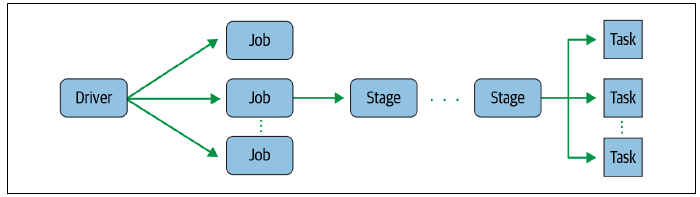

## Transformations, Actions and Lazy Evaluation

* **Transformations**:
  * Operations that don't change the original dataframe (DFs are immutable) but create a new dataframe as a result of the operation
  * Examples: `select()`, `filter()`, etc.
  * Evaluated lazily; i.e. only recorded or stored as lineage (as DAG) without actual execution
  * Execution is delayed until an actual action is invoked (read from or written to disk)
* **Action**:
  * Triggers the lazy evaluation of all recorded transformations
* **Lazy Evaluation**:
  * Allows Spark to optimize your queries by peeking into your chained transformations lineage  

| **Transformations**                          | **Actions**                                  |
|----------------------------------------------|----------------------------------------------|
| `map(func)`                                  | `collect()`                                  |
| `filter(func)`                               | `count()`                                    |
| `flatMap(func)`                              | `take(n)`                                    |
| `mapPartitions(func)`                        | `top(n)`                                     |
| `mapPartitionsWithIndex(func)`               | `reduce(func)`                               |
| `sample(withReplacement, fraction, seed)`    | `foreach(func)`                              |
| `union(otherRDD)`                            | `countByKey()`                               |
| `intersection(otherRDD)`                     | `saveAsTextFile(path)`                       |
| `distinct()`                                 | `saveAsSequenceFile(path)`                   |
| `groupByKey()`                               | `saveAsObjectFile(path)`                     |
| `reduceByKey(func)`                          | `takeOrdered(n)`                             |
| `sortByKey()`                                | `takeSample(withReplacement, num, seed)`     |
| `join(otherRDD)`                             |                                              |
| `coalesce(numPartitions)`                    |                                              |
| `repartition(numPartitions)`                 |                                              |

## Narrow and Wide Transformations

* Transofrmations are classified as having _narrow dependencies or wide dependencies_
* Narrow transformation is when a single output partition can be computed from a single input partition
* Wide transformation is when a single output partition is computed from multiple input partitions

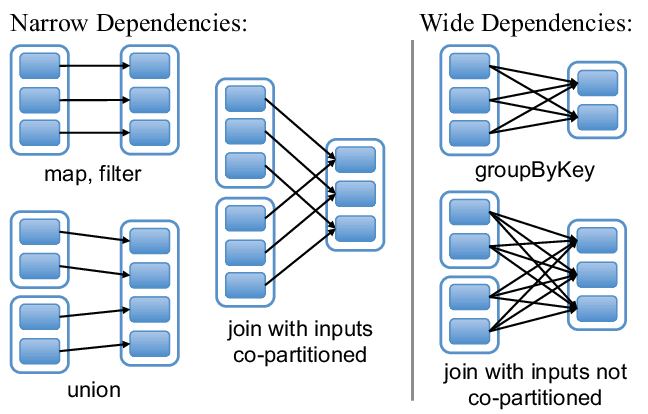

## Submitting Standalone Applications

`./spark-submit /code/mnmcount.py file:///data/mnm_dataset.csv`

**`--master`** option:
- **Local Operation:**
  - `--master local[*] --deploy-mode client`  
    Runs locally utilizing all cores, with the driver on the local machine.
- **Standalone Cluster:**
  - `--master spark://<MASTER_URL>:7077 --deploy-mode client`
    The driver runs locally, connects to a standalone cluster.
  - `--master spark://<MASTER_URL>:7077 --deploy-mode cluster`
    Both the driver and executors run in the Spark standalone cluster.
- **YARN:**
  - `--master yarn --deploy-mode client`
    Driver runs on the machine where you invoke `spark-submit` and executors on YARN.
  - `--master yarn --deploy-mode cluster`
    Driver runs inside YARN-managed containers, suitable for production deployments.
- **Kubernetes:**
  - `--master k8s://https://<HOST>:<PORT> --deploy-mode cluster`
- **Mesos:** DEPRICATED
  - `--master mesos://<HOST>:5050 --deploy-mode client/cluster`
    Connects to a Mesos cluster with driver location decided by `--deploy-mode`.

| **Master Option**            | **Description**                                                                           | **Deploy Mode**   | **Driver Location**                       | **Use Case**                                      |
|------------------------------|-------------------------------------------------------------------------------------------|-------------------|-------------------------------------------|---------------------------------------------------|
| **`local`**                  | Uses one thread on the local machine.                                                     | `client`          | Local machine                             | Debugging, simple local testing                   |
| **`local[*]`**               | Uses all available cores on the local machine.                                            | `client`          | Local machine                             | Full parallelism for local development/testing    |
| **`local[N]`**               | Uses `N` threads on the local machine.                                                    | `client`          | Local machine                             | Controlled parallelism for local testing          |
| **`spark://<MASTER_URL>:7077`** | Connects to a standalone Spark cluster.                                                   | `client`          | Local machine                             | Interactive jobs on standalone Spark cluster      |
| **`spark://<MASTER_URL>:7077`** | Use standalone Spark cluster.                                                             | `cluster`         | Cluster node                              | Production jobs with resources managed by cluster |
| **`yarn`**                   | Runs on a Hadoop YARN cluster.                                                            | `client`          | Local machine                             | Interactive jobs, direct console access           |
| **`yarn`**                   | Uses YARN for execution.                                                                  | `cluster`         | YARN cluster node                         | Batch jobs, resource-efficient production runs    |
| **`mesos://<HOST>:5050`**    | Connects to a Mesos cluster.                                                              | `client`          | Local machine                             | Mesos interactive jobs                            |
| **`mesos://<HOST>:5050`**    | Use Mesos cluster for execution.                                                          | `cluster`         | Mesos-managed cluster node                | Mesos production jobs                             |
| **`k8s://https://<HOST>:<PORT>`** | Connects to a Kubernetes cluster.                                                        | `cluster`         | Kubernetes pod                            | Using Kubernetes for resource orchestration       |

`# /usr/local/spark/bin/spark-submit --master local --deploy-mode client /code/mnmcount.py file:///data/mnm_dataset.csv`

`# /usr/local/spark/bin/spark-submit --master yarn --deploy-mode client /code/mnmcount.py file:///data/mnm_dataset.csv`

Notice that you can see the output of the py file in the console because the driver is running locally

`# /usr/local/spark/bin/spark-submit --master yarn --deploy-mode cluster /code/mnmcount.py file:///data/mnm_dataset.csv`

Here you won't be able to see the output in the console as the driver is running within the ndoes. Browse to the resource manager UI and check the logs.

**Submitting applications using native standalone cluster**  
* `# /usr/local/spark/sbin/start-master.sh`
* `# /usr/local/spark/sbin/start-worker.sh spark://sparkc:7077`
* `# /usr/local/spark/bin/spark-submit --master spark://sparkc:7077 --deploy-mode cluster /code/mnmcount.py file:///data/mnm_dataset.csv`

# The Resilient Distributed Datasets (RDD) API

* The most basic programming abstraction in Spark
* 3 major characteristics:
  * Dependencies
  * Partitions
  * Compute function (Iterator)

**Dependencies**  
Necessary information for Spark to be able to reconstruct the RDD -> Resiliency

**Partitions**  
A chunck of data within an RDD that can be parocessed in parallel and can be divided across the nodes for parallelism. Partitions are independent and can be processed by tasks. 

**Compute Function**  
Produces an `Iterator[T]` for data stored in RDDs

**Challenges**  
- Compute Functions are opaque, i.e. Spark doesn't know what are you doing; select, join, filter, etc.
- `Iterator[T]` object is also opaque and a generic data type
- Thus, Spark has no way of inspecting or optimizing the operations. All it can do is just serialize the opaque object as a series of bytes without any compression technique

In [13]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("RDD").setMaster("local")
sc = SparkContext(conf=conf)

In [ ]:
sc

In [14]:
data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data)
distData.reduce(lambda a, b: a + b)


15

In [66]:
sc.stop()

In [53]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("RDD").setMaster("local")
sc = SparkContext(conf=conf)

distFile = sc.textFile("file:///data/data.txt")
length = distFile.map(lambda s: len(s))
total_length = length.reduce(lambda a, b: a + b)
print(total_length)

sc.stop()

1517


In [62]:
# Use user defined functions as mappers
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("RDD").setMaster("local")
sc = SparkContext(conf=conf)
def myFunc(s):
    words = s.split(" ")
    return len(words)

print(sc.textFile("file:///data/data.txt").map(myFunc).reduce(lambda a, b: a + b))

sc.stop()

257


In [68]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("RDD").setMaster("local")
sc = SparkContext(conf=conf)

distFile = sc.textFile("file:///data/data.txt")
pairs = distFile.map(lambda s: (s, 1))
counts = pairs.reduceByKey(lambda a, b: a + b)
print(counts.collect())

sc.stop()

[('Overview', 1), ('', 4), ('same line', 2), ('At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. RDDs are created by starting with a file in the Hadoop file system (or any other Hadoop-supported file system), or an existing Scala collection in the driver program, and transforming it. Users may also ask Spark to persist an RDD in memory, allowing it to be reused efficiently across parallel operations. Finally, RDDs automatically recover from node failures.', 1), ('A second abstraction in Spark is shared variables that can be used in parallel operations. By default, when Spark runs a function in parallel as a set of tasks on different nodes, it ships a copy of each variable used in the func

# The DataFrame API